In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

In [2]:
data = pd.read_csv('LasVegasTripAdvisorReviews-Dataset12.csv',sep=';')
data.head()

User country  Nr_reviews  Nr_hotel_reviews  Helpful_votes  Score  \
0          USA          11                 4             13      5   
1          USA         119                21             75      3   
2          USA          36                 9             25      5   
3           UK          14                 7             14      4   
4       Canada           5                 5              2      4   

  Period of stay Traveler type Pool  Gym Tennis_court Spa Casino  \
0        Dec-Feb       Friends   NO  YES           NO  NO    YES   
1        Dec-Feb      Business   NO  YES           NO  NO    YES   
2        Mar-May      Families   NO  YES           NO  NO    YES   
3        Mar-May       Friends   NO  YES           NO  NO    YES   
4        Mar-May          Solo   NO  YES           NO  NO    YES   

  Free_internet                              Hotel name Hotel stars  Nr_rooms  \
0           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
1           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
2           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
3           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
4           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   

  User continent  Member_years Review month Review weekday  
0  North America             9      January       Thursday  
1  North America             3      January         Friday  
2  North America             2     February       Saturday  
3         Europe             6     February         Friday  
4  North America             7        March        Tuesday

In [5]:
categorical = list(data.select_dtypes(include=['object']).columns.values)
categorical

['User country',
 'Period of stay',
 'Traveler type',
 'Pool',
 'Gym',
 'Tennis_court',
 'Spa',
 'Casino',
 'Free_internet',
 'Hotel name',
 'Hotel stars',
 'User continent',
 'Review month',
 'Review weekday']

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
data['Period of stay'] = data['Period of stay'].map({'Dec-Feb':'winter', 'Mar-May':'spring', 'Jun-Aug' :'summer','Sep-Nov':'autumn'})

for i in range(0, len(categorical)):
    print(data[categorical[i]].unique())

['USA' 'UK' 'Canada' 'India' 'Australia' 'New Zeland' 'Ireland' 'Egypt'
 'Finland' 'Kenya' 'Jordan' 'Netherlands' 'Syria' 'Scotland'
 'South Africa' 'Swiss' 'United Arab Emirates' 'Hungary' 'China' 'Greece'
 'Mexico' 'Croatia' 'Germany' 'Malaysia' 'Thailand' 'Phillippines'
 'Israel' 'India ' 'Belgium' 'Puerto Rico' 'Switzerland' 'Norway' 'France'
 'Spain' 'Singapore' 'Brazil' 'Costa Rica' 'Iran' 'Saudi Arabia'
 'Honduras' 'Denmark' 'Taiwan' 'Hawaii' 'Kuwait' 'Czech Republic' 'Japan'
 'Korea' 'Italy']
[nan]
['Friends' 'Business' 'Families' 'Solo' 'Couples']
['NO' 'YES']
['YES' 'NO']
['NO' 'YES']
['NO' 'YES']
['YES' 'NO']
['YES' 'NO']
['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel' 'Caesars Palace'
 'The Cosmopolitan Las Vegas' 'The Palazzo Resort Hotel Casino'
 'Wynn Las Vegas' 'Trump International Hotel Las Vegas' 'The Cromwell'
 'Encore at wynn 

In [7]:
for i in range(0, len(categorical)):
    data[categorical[i]] = le.fit_transform(data[categorical[i]])
    
data.head()

User country  Nr_reviews  Nr_hotel_reviews  Helpful_votes  Score  \
0            46          11                 4             13      5   
1            46         119                21             75      3   
2            46          36                 9             25      5   
3            45          14                 7             14      4   
4             3           5                 5              2      4   

   Period of stay  Traveler type  Pool  Gym  Tennis_court  Spa  Casino  \
0               0              3     0    1             0    0       1   
1               0              0     0    1             0    0       1   
2               0              2     0    1             0    0       1   
3               0              3     0    1             0    0       1   
4               0              4     0    1             0    0       1   

   Free_internet  Hotel name  Hotel stars  Nr_rooms  User continent  \
0              1           2            0      3773               3   
1              1           2            0      3773               3   
2              1           2            0      3773               3   
3              1           2            0      3773               2   
4              1           2            0      3773               3   

   Member_years  Review month  Review weekday  
0             9             4               4  
1             3             4               0  
2             2             3               2  
3             6             3               0  
4             7             7               5

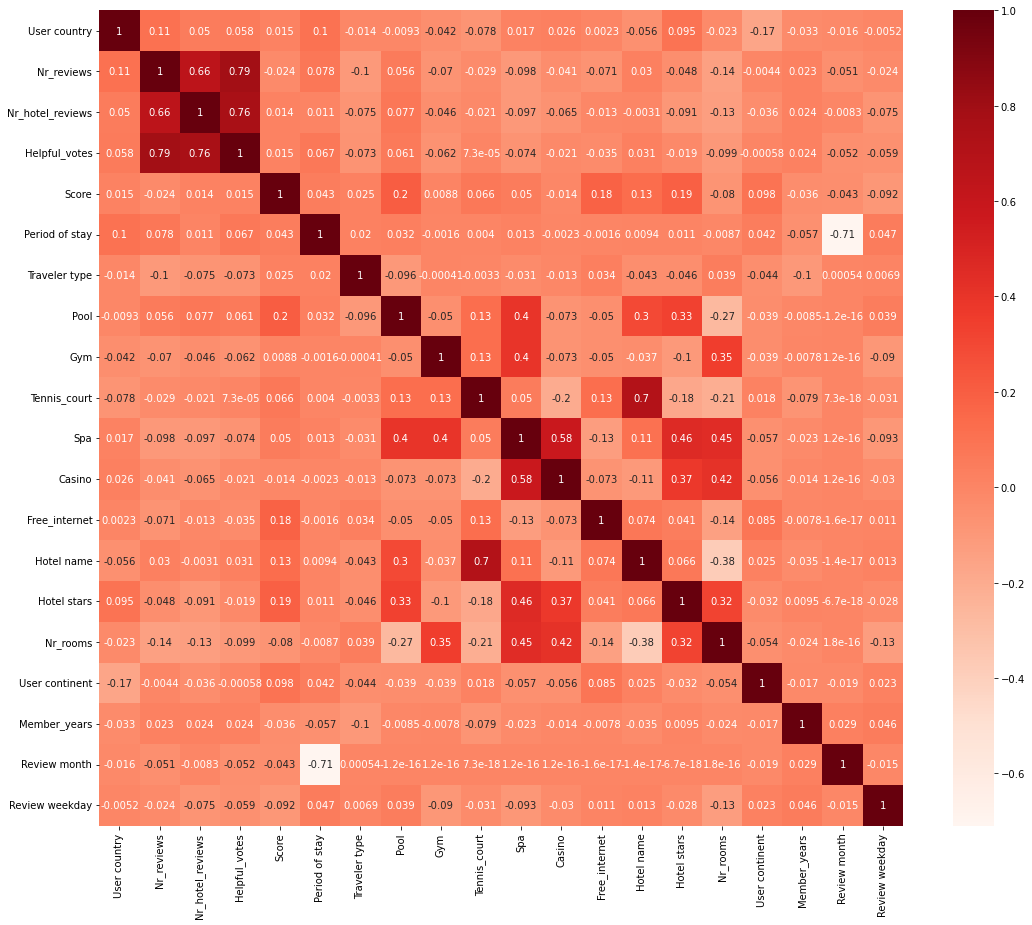

In [22]:
plt.figure(figsize=(18,15))
cor = data.corr()
sns.heatmap(cor,annot=True , cmap=plt.cm.Reds)
plt.show()

In [23]:
cor_target = abs(cor['Nr_reviews'])
relevant_features = cor_target[cor_target > 0.5]
print(relevant_features)

Nr_reviews          1.000000
Nr_hotel_reviews    0.655080
Helpful_votes       0.790696
Name: Nr_reviews, dtype: float64


In [24]:
print(data[['Nr_hotel_reviews','Helpful_votes']].corr())

#Karena variabel Nr. hotel reviews dan Helpful votes memiliki korelasi yang cukup besar dengan variabel Nr. reviews maka kedua variabel tersebut merupakan variabel yang paling relevan dibandingkan dengan variabel yang lain

                  Nr_hotel_reviews  Helpful_votes
Nr_hotel_reviews          1.000000       0.764322
Helpful_votes             0.764322       1.000000
